In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scienceplots
plt.style.use(['science'])
plt.rcParams.update({'font.size': 25, 'font.family': 'sans-serif'})

In [6]:
cal_df = pd.read_excel("data.xlsx", sheet_name="Calibration")
cal_df

,Current(A),Magnetic Field(G)
0,0.00,539
1,0.25,888
2,0.50,1300
3,0.75,1770
4,1.00,2290
5,1.25,2760
6,1.50,3230
7,1.75,3670
8,2.00,4120
9,2.25,4540


In [68]:
current = np.array(cal_df["Current(A)"])
Mfield = np.array(cal_df["Magnetic Field(G)"])/1000

In [69]:
def linfit(x, m, c):
    return m*x + c

In [70]:
params, pcov = curve_fit(linfit, current, Mfield)
perr = np.sqrt(np.diag(pcov))
perr, params

(array([0.01832145, 0.02709779]), array([1.81501818, 0.46459091]))

In [71]:
xvals = np.linspace(0, 3, 1000)

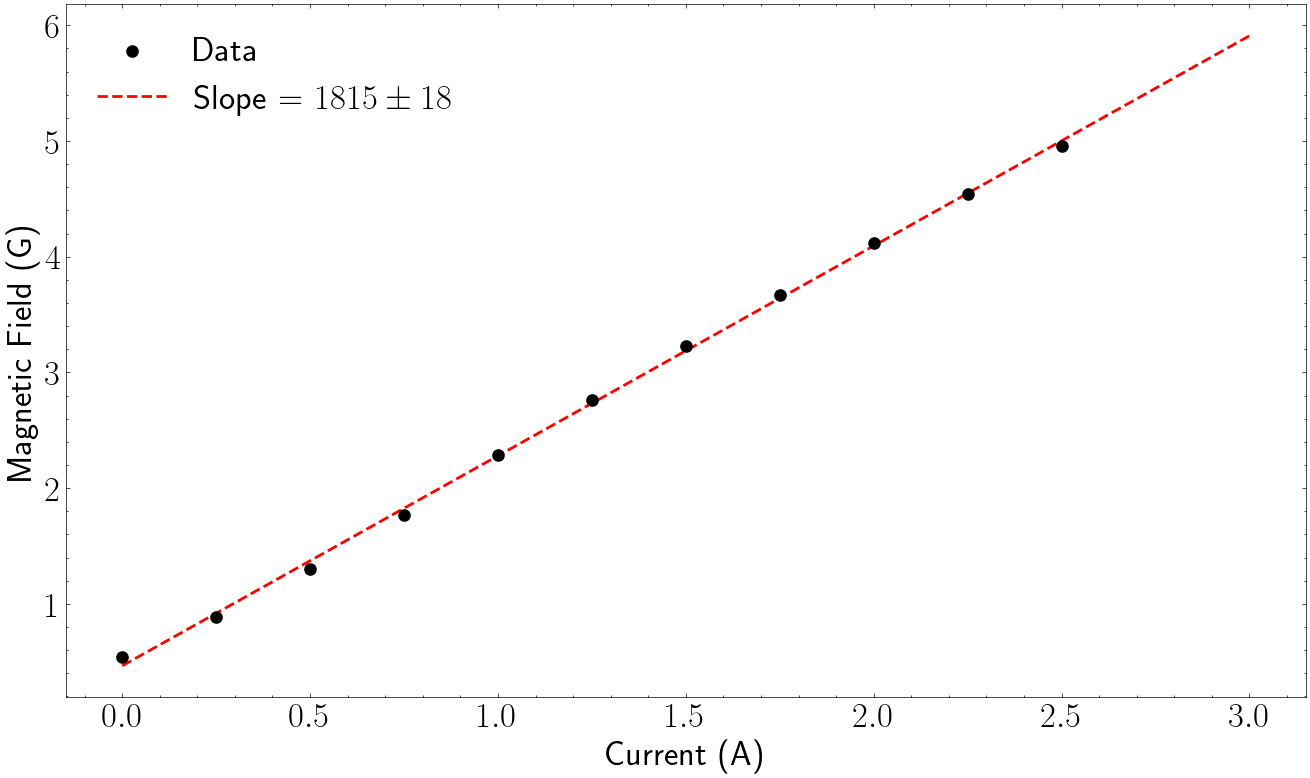

In [72]:
plt.figure(figsize=(16,9))
plt.scatter(current, Mfield, color='black', edgecolor='black', lw = 2,label='Data', s=50)
plt.plot(xvals, linfit(xvals, *params), color='red', label=r'Slope = $1815 \pm 18$', zorder = 0, lw=2, ls = "--")
plt.xlabel('Current (A)')
plt.ylabel('Magnetic Field (G)')
plt.legend()

In [40]:
u_df = pd.read_excel("data.xlsx", sheet_name="Utube")

In [41]:
u_df

,Current(A),h (mm),Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0.00,7.477,NaN,min,7.3
1,0.25,7.484,NaN,NaN,NaN
2,0.50,7.504,NaN,NaN,NaN
3,0.75,7.536,NaN,NaN,NaN
4,1.00,7.566,NaN,NaN,NaN
5,1.25,7.589,NaN,NaN,NaN
6,1.50,7.645,NaN,NaN,NaN
7,1.75,7.681,NaN,NaN,NaN
8,2.00,7.749,NaN,NaN,NaN
9,2.25,7.798,NaN,NaN,NaN


In [45]:
current_utube = np.array(u_df["Current(A)"])
height = np.array(u_df["h (mm)"]) - 7.3

In [49]:
magfield = linfit(current_utube, *params)
magfield
magfield_kg = magfield * 1e-3

In [66]:
par2, pcov2 = curve_fit(linfit, magfield_kg**2, height)
perr2 = np.sqrt(np.diag(pcov2))
perr2, par2

(array([0.00023449, 0.00292563]), array([0.0158444, 0.1764541]))

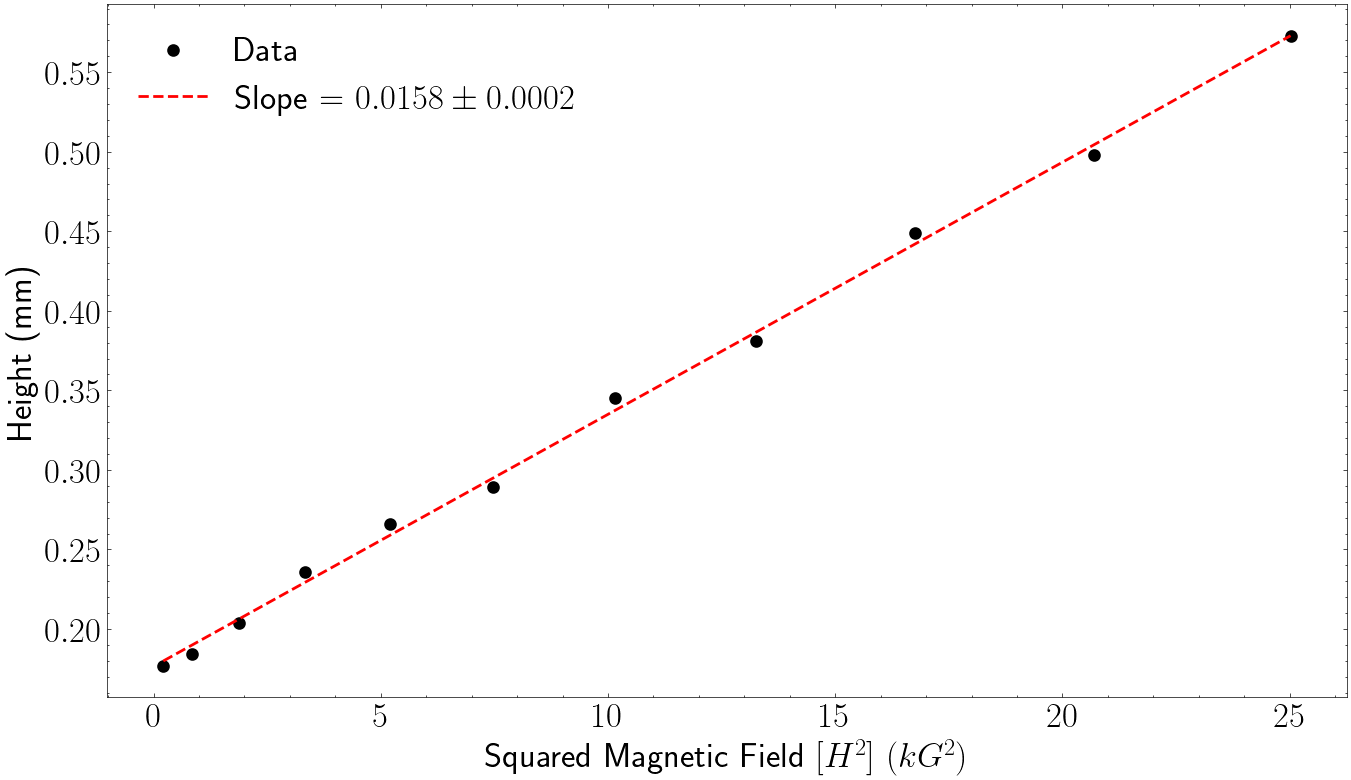

In [60]:
plt.figure(figsize=(16,9))
plt.scatter( magfield_kg**2, height, color='black', edgecolor='black', lw = 2,label='Data', s=50)
plt.plot(magfield_kg**2, linfit(magfield_kg**2, *par2), color='red', lw=2, label=r'Slope = $0.0158 \pm 0.0002$', ls ="--")
plt.xlabel(r'Squared Magnetic Field $[H^2]$ $(kG^2)$')
plt.ylabel('Height (mm)')
plt.legend()

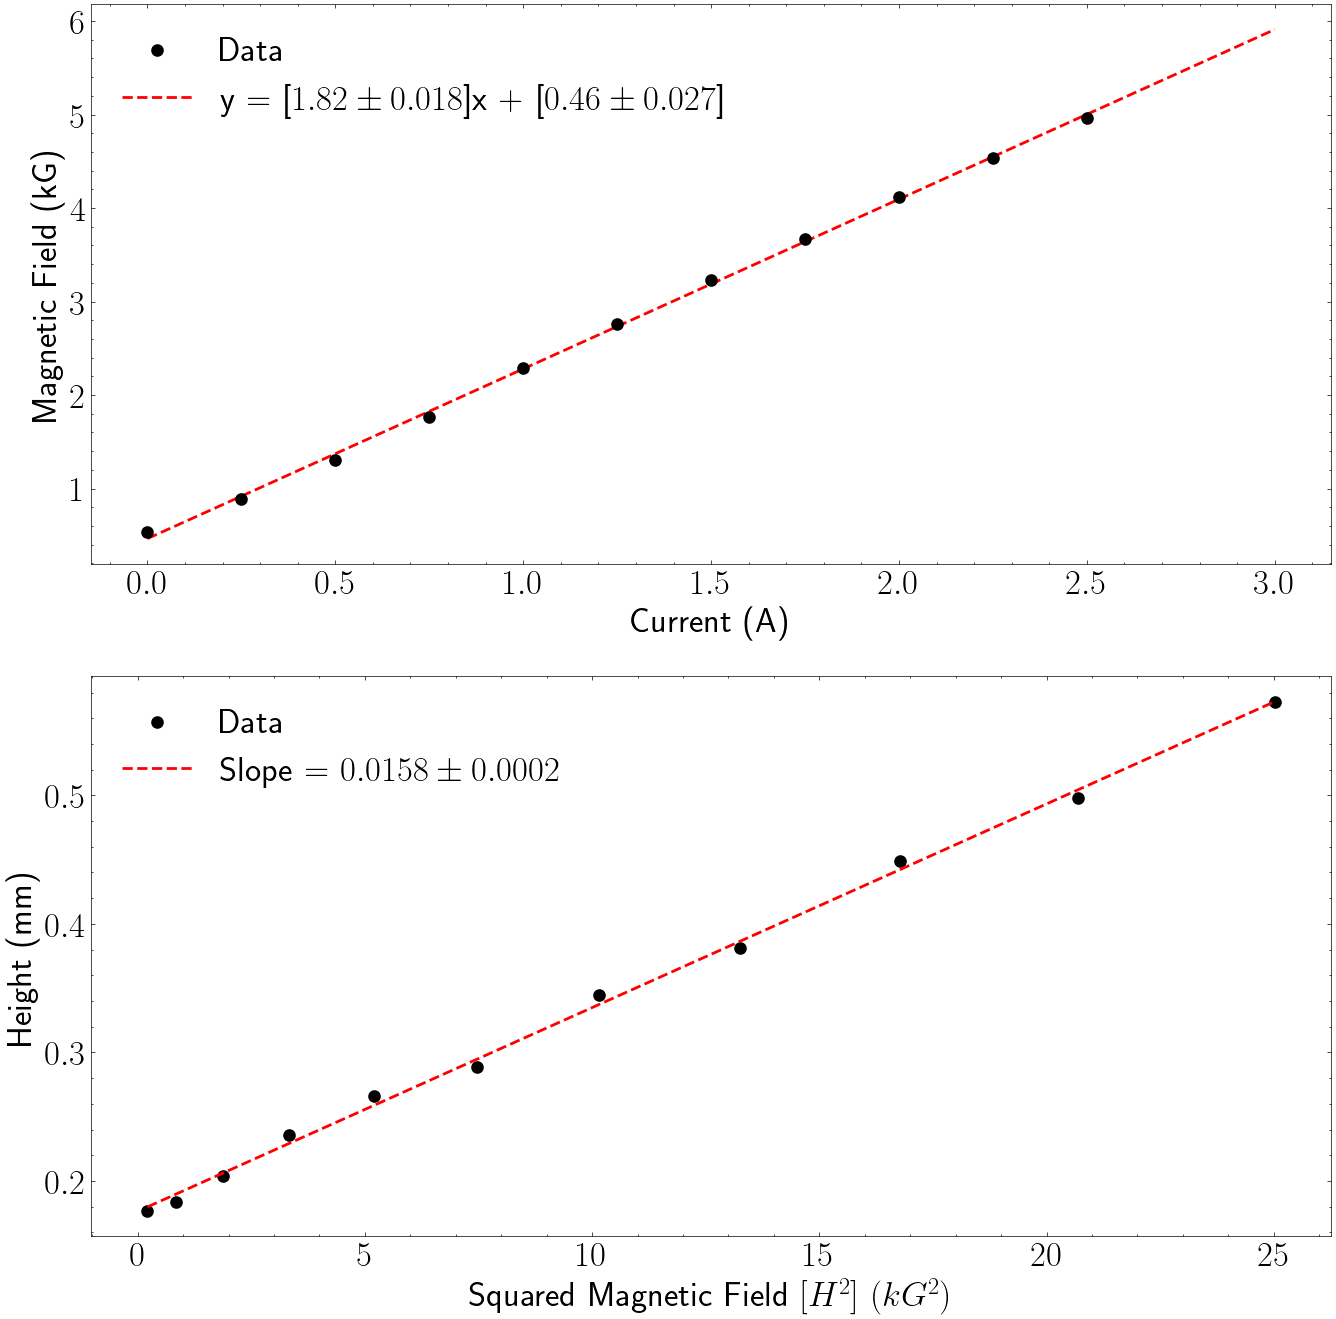

In [81]:
fig, ax = plt.subplots(2,1, figsize=(16,16))
ax[0].scatter(current, Mfield, color='black', edgecolor='black', lw = 2,label='Data', s=50)
ax[0].plot(xvals, linfit(xvals, *params), color='red', label=r'y = [$1.82 \pm 0.018$]x + [$0.46 \pm 0.027$]', zorder = 0, lw=2, ls = "--")
ax[0].set_xlabel('Current (A)')
ax[0].set_ylabel('Magnetic Field (kG)')          
ax[0].legend()
ax[1].scatter( magfield_kg**2, height, color='black', edgecolor='black', lw = 2,label='Data', s=50)
ax[1].plot(magfield_kg**2, linfit(magfield_kg**2, *par2), color='red', lw=2, label=r'Slope = $0.0158 \pm 0.0002$', ls ="--")
ax[1].set_xlabel(r'Squared Magnetic Field $[H^2]$ $(kG^2)$')
ax[1].set_ylabel('Height (mm)')
ax[1].legend()
fig.savefig("combined_plot.png", dpi=300)